In [1]:
import pandas as pd  
import numpy as np  
import altair as alt
alt.data_transformers.enable('csv')

DataTransformerRegistry.enable('csv')

In [25]:
sortdata = pd.read_csv(r"D:\jupyter notebooks\3941.10 Plaatsgebonden risico kaarten\staafdiagram\plaatsgebonden2015.csv")
sortdata.head()

,GM_NAAM,BU_NAAM,BUCODE,Drempel,Diepte,MEDIAAN,BOVEN,BENEDEN
0,'s-Gravenhage,Oostduinen,BU05180170,-1,Geen overstroming,1.000000e+00,1.000000e+00,1.000000e-07
1,'s-Gravenhage,Belgisch Park,BU05180271,-1,Geen overstroming,1.000000e+00,1.000000e+00,3.680000e-08
2,'s-Gravenhage,Belgisch Park,BU05180271,0,0-20 cm,3.680000e-08,3.680000e-08,3.680000e-08
3,'s-Gravenhage,Belgisch Park,BU05180271,20,20-50 cm,3.680000e-08,3.680000e-08,3.680000e-08
4,'s-Gravenhage,Belgisch Park,BU05180271,50,50-200 cm,3.680000e-08,3.680000e-08,1.000000e-07


In [3]:
# topsteden = ['Nijmegen', 'Breda', 'Groningen', 'Almere', 'Tilburg', 'Eindhoven', 'Utrecht', 'Rotterdam', 'Amsterdam']#"'s-Gravenhage"
# topdata = sortdata[sortdata['GM_NAAM'].isin(topsteden)]

In [26]:
steden = sortdata['GM_NAAM'].unique().tolist()

In [6]:
# # inlcude dropdown filter

# loc_dropdown = alt.binding_select(options=topdata['GM_NAAM'].unique().tolist())
# loc_select = alt.selection_single(fields=['GM_NAAM'], bind=loc_dropdown, name='location')

# chart = alt.Chart(topdata).mark_rect().encode(
#     x = alt.X('BU_NAAM', title='Buurt'),
#     y = alt.Y('BENEDEN', axis=alt.Axis(format='%'), title='kans',scale = alt.Scale(type="log")),
#     y2 = 'BOVEN',
#     color = alt.Color('Diepte', 
#                       sort=['Geen overstroming', '0-20cm', '20-50cm', '50-200cm', 'Meer dan 200cm'],
#                       scale=alt.Scale(range=['#B2B2B2','#619900','#C5DB00','#FFD900', '#FF8400', '#FF2600']),
#                       legend=alt.Legend(title='Waterdiepte')), 
#     column = alt.Column('GM_NAAM', title='Gemeente'),
#     tooltip=['MEDIAAN']
# ).add_selection(loc_select).transform_filter(loc_select)

In [27]:
for stad in steden:
    gemeente = sortdata[sortdata['GM_NAAM'] == stad]
    # inlcude dropdown filter
    chart = alt.Chart(gemeente).mark_rect().encode(
        x = alt.X('BU_NAAM', title='Buurt'),
        y = alt.Y('BENEDEN', axis=alt.Axis(format='%'), title='kans',scale = alt.Scale(type="log")),
        y2 = 'BOVEN',
        color = alt.Color('Diepte', 
                          sort=['Geen overstroming', '0-20cm', '20-50cm', '50-200cm', 'Meer dan 200cm'],
                          scale=alt.Scale(range=['#B2B2B2','#619900','#C5DB00','#FFD900', '#FF8400', '#FF2600']),
                          legend=alt.Legend(title='Waterdiepte')), 
        column = alt.Column('GM_NAAM', title='Gemeente'),
        tooltip=['MEDIAAN']
    ).properties(
    title='huidig')
    chart.save(r'D:\jupyter notebooks\3941.10 Plaatsgebonden risico kaarten\staafdiagram\steden_2015\{}.html'.format(stad))    

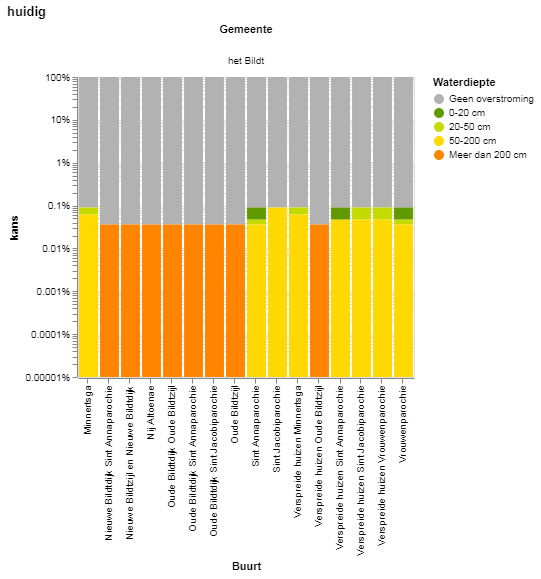

In [28]:
chart